METODO HEURISTICO

In [2]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg
a=1/7
print(a)

0.14285714285714285


In [3]:
import numpy as np

A=([[  1,   3,   3,   5,   5],
    [1/3,   1,   3,   3,   3],
    [1/3, 1/3,   1, 1/3,   3],
    [1/5, 1/3,   3,   1,   3],
    [1/5, 1/3, 1/3, 1/3,  1]])

B=np.array(A) # para transformarla en una matriz

values, vectores=np.linalg.eig(B) # Función para calcular los valores y vectores propios

vector_norm=vectores/np.linalg.norm(vectores, ord=1) # normalización de los vectores

print('esto son los valores propios',values)

esto son los valores propios [ 5.44827263+0.j         -0.00734381+1.54808161j -0.00734381-1.54808161j
 -0.12923424+0.j         -0.30435076+0.j        ]


In [4]:
print('esto son los vectores propios', vectores)

esto son los vectores propios [[ 0.8334549 +0.j         -0.82422775+0.j         -0.82422775-0.j
   0.88907559+0.j          0.27588278+0.j        ]
 [ 0.43601212+0.j         -0.20030822-0.35874748j -0.20030822+0.35874748j
  -0.43573951+0.j         -0.81275287+0.j        ]
 [ 0.18503628+0.j          0.14430748+0.14260517j  0.14430748-0.14260517j
   0.01145591+0.j         -0.23241043+0.j        ]
 [ 0.26498907+0.j          0.23384605-0.21594628j  0.23384605+0.21594628j
   0.12201531+0.j          0.44373141+0.j        ]
 [ 0.10386881+0.j         -0.03418946+0.0904373j  -0.03418946-0.0904373j
  -0.06824007+0.j          0.11139698+0.j        ]]


In [5]:
print('esto son los vectores propios normalizados',vector_norm)

esto son los vectores propios normalizados [[ 0.44423102+0.j         -0.43931295+0.j         -0.43931295+0.j
   0.47387682+0.j          0.14704538+0.j        ]
 [ 0.23239423+0.j         -0.10676418-0.19121222j -0.10676418+0.19121222j
  -0.23224893+0.j         -0.43319685+0.j        ]
 [ 0.09862424+0.j          0.07691581+0.07600848j  0.07691581-0.07600848j
   0.00610599+0.j         -0.12387464+0.j        ]
 [ 0.14123903+0.j          0.12463982-0.11509925j  0.12463982+0.11509925j
   0.0650341 +0.j          0.23650861+0.j        ]
 [ 0.05536202+0.j         -0.01822296+0.04820303j -0.01822296-0.04820303j
  -0.03637192+0.j          0.05937453+0.j        ]]


In [6]:
from tabulate import tabulate


w=vector_norm[:,0]

print(w)



[0.44423102+0.j 0.23239423+0.j 0.09862424+0.j 0.14123903+0.j
 0.05536202+0.j]


se calcula la coherecia

In [7]:
CI=(values[0]-len(values))/(len(values)-1)

CR= CI/1.24

print(CR)

(0.09037754576483986+0j)


Importamos los mapas

Mapa de pendiente

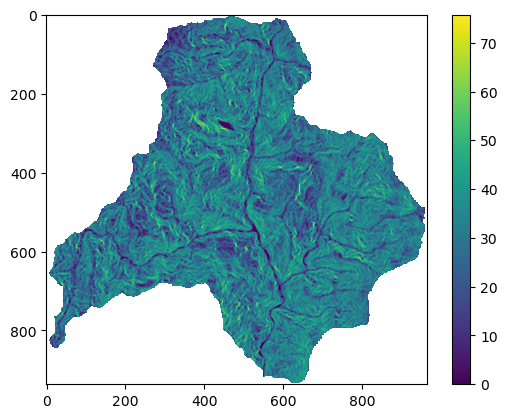

In [8]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
pendiente=raster.read(1)
pendiente=np.where(pendiente<0,np.nan,pendiente)
plt.imshow(pendiente)
plt.colorbar();


In [9]:
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape # otra forma de saber las dimensiones

(484040,)

Mapa de curvatura

(484040,)

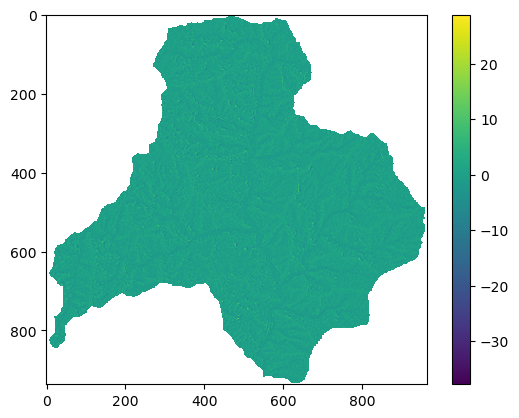

In [10]:

raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Curvatura/Curvatura_p12.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura<-37.76,np.nan,curvatura)

plt.imshow(curvatura)
plt.colorbar()
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
curvatura_vector_MenM.shape
curvatura_vector=curvatura.ravel()  # para pasarlo a un vector
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)] # para eliminar  del vector los datos NaN
curvatura_vector_MenM.shape # otra forma de saber las dimensiones


Mapa de flujo acumulado

(484040,)

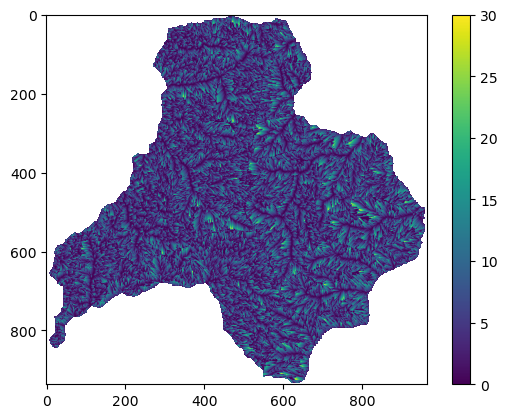

In [11]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Flujo%20acumulado/Flujoacum_11.tif?raw=true')
flujo=raster.read(1)
flujo=np.where(flujo<0,np.nan,flujo)
flujo=np.where(flujo>30,0,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
plt.imshow(flujo)
plt.colorbar()
flujo.shape
flujo_vector_MenM.shape
flujo_vector=flujo.ravel()  # para pasarlo a un vector
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)] # para eliminar  del vector los datos NaN
flujo_vector_MenM.shape # otra forma de saber las dimensiones

Mapa de aspecto

(484040,)

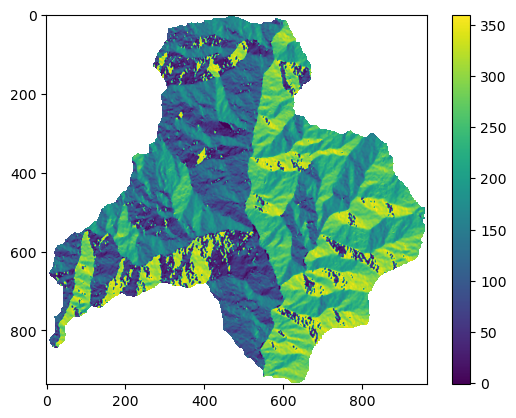

In [12]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Aspecto/Aspecto1.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

Mapa de geología

(484040,)

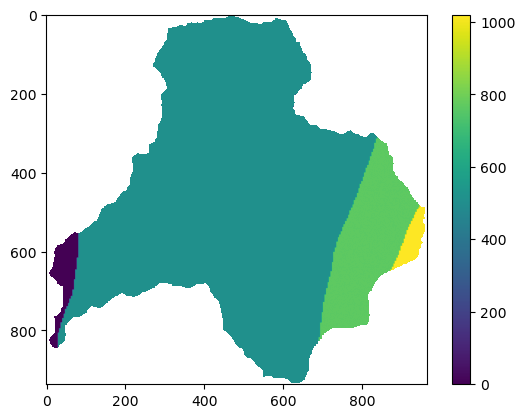

In [13]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,msk)
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Geolog%C3%ADa/Geolog%C3%ADaF.tif?raw=true')
geologia=raster.read(1)

geologia=np.where(geologia<0,np.nan,geologia)

geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]

geologia_vector_MenM.shape
geologia=msk*geologia
geologia=np.where(geologia==255,1,geologia)
plt.imshow(geologia)
plt.colorbar();
geologia_vector=geologia.ravel()  # para pasarlo a un vector
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)] # para eliminar  del vector los datos NaN
geologia_vector_MenM.shape # otra forma de saber las dimensiones

In [14]:
np.unique(geologia)

array([0.00e+00, 1.00e+00, 5.10e+02, 7.65e+02, 1.02e+03,      nan])

Importamos inventario

(484040,)

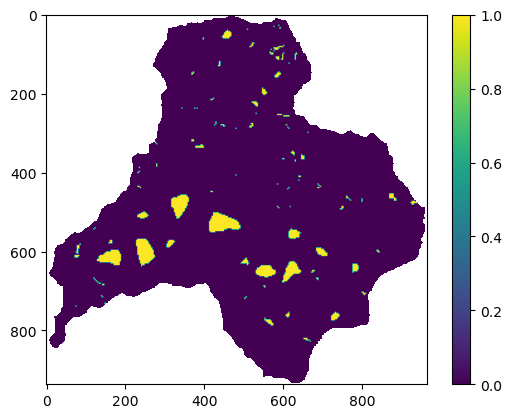

In [15]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Inventario/inventario.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

Crear Dataframe

In [16]:
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'Curvatura':curvatura_vector_MenM,'flujo_acum':flujo_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))

['inventario', 'pendiente', 'Curvatura', 'flujo_acum', 'aspecto', 'geologia']


Graficas para categorizar las variables

In [17]:
landslides=df.inventario.astype(bool)
si_lands=df[landslides]
no_lands=df[~landslides]

 Densidad de los datos de pendiente con respecto al inventario

<Figure size 800x600 with 0 Axes>

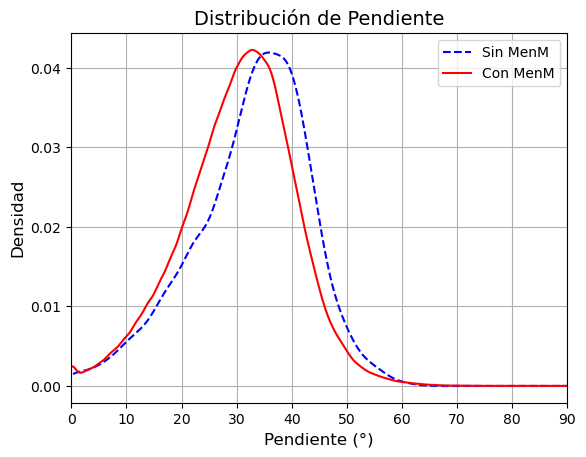

In [18]:

# Crear una figura de un tamaño personalizado
plt.figure(figsize=(8, 6))

# Crear un fondo claro
fig, ax = plt.subplots()
ax.set_facecolor('white')

# Graficar las curvas con colores y estilos personalizados
si_lands['pendiente'].plot.kde(ax=ax, label='Sin MenM', color='blue', linestyle='--')
no_lands['pendiente'].plot.kde(ax=ax, label='Con MenM', color='red', linestyle='-')
ax.set_xlim(0, 90)

# Añadir un título
ax.set_title('Distribución de Pendiente', size=14)

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Pendiente (°)', color='black', size=12)
ax.set_ylabel('Densidad', color='black', size=12)
ax.legend(loc=1, fontsize=10)

# Añadir una cuadrícula
ax.grid(True)

# Tamaño de las etiquetas y ejes
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()  # Mostrar el gráfico

 Densidad de los datos de curvatura con respecto al inventario

<Figure size 800x600 with 0 Axes>

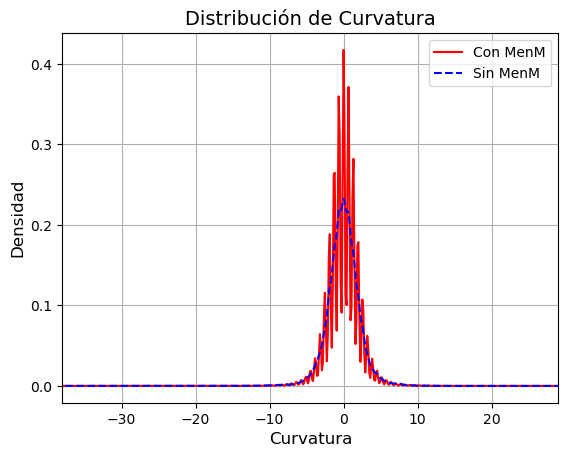

In [19]:

# Crear una figura de un tamaño personalizado
plt.figure(figsize=(8, 6))

# Crear un fondo claro
fig, ax = plt.subplots()
ax.set_facecolor('white')

# Graficar las curvas con colores y estilos personalizados
no_lands['Curvatura'].plot.kde(ax=ax, label='Con MenM', color='red', linestyle='-')
si_lands['Curvatura'].plot.kde(ax=ax, label='Sin MenM', color='blue', linestyle='--')

ax.set_xlim(-38, 29)

# Añadir un título
ax.set_title('Distribución de Curvatura', size=14)

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Curvatura', color='black', size=12)
ax.set_ylabel('Densidad', color='black', size=12)
ax.legend(loc=1, fontsize=10)

# Añadir una cuadrícula
ax.grid(True)

# Tamaño de las etiquetas y ejes
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()  # Mostrar el gráfico

 Densidad de los datos de flujo_acum con respecto al inventario

<Figure size 800x600 with 0 Axes>

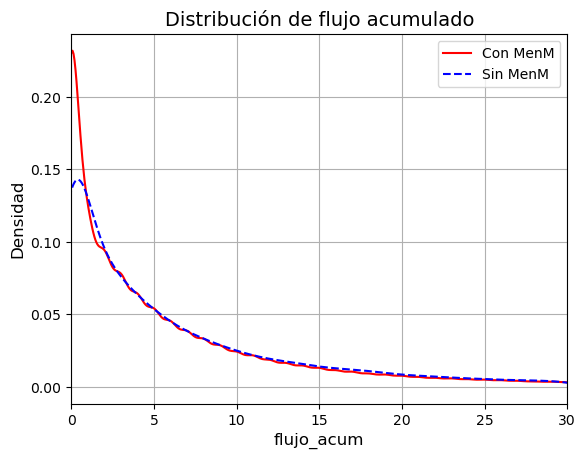

In [20]:

# Crear una figura de un tamaño personalizado
plt.figure(figsize=(8, 6))

# Crear un fondo claro
fig, ax = plt.subplots()
ax.set_facecolor('white')

# Graficar las curvas con colores y estilos personalizados
no_lands['flujo_acum'].plot.kde(ax=ax, label='Con MenM', color='red', linestyle='-')
si_lands['flujo_acum'].plot.kde(ax=ax, label='Sin MenM', color='blue', linestyle='--')

ax.set_xlim(0, 30)

# Añadir un título
ax.set_title('Distribución de flujo acumulado', size=14)

# Etiquetas de los ejes y leyenda
ax.set_xlabel('flujo_acum', color='black', size=12)
ax.set_ylabel('Densidad', color='black', size=12)
ax.legend(loc=1, fontsize=10)

# Añadir una cuadrícula
ax.grid(True)

# Tamaño de las etiquetas y ejes
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()  # Mostrar el gráfico

 Densidad de los datos de aspecto con respecto al inventario

<Figure size 800x600 with 0 Axes>

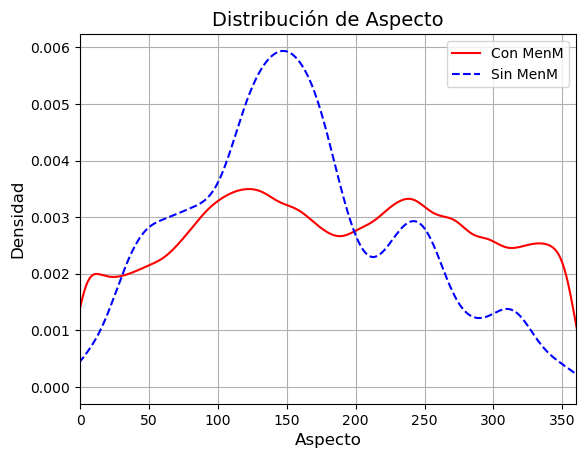

In [21]:


# Crear una figura de un tamaño personalizado
plt.figure(figsize=(8, 6))

# Crear un fondo claro
fig, ax = plt.subplots()
ax.set_facecolor('white')

# Graficar las curvas con colores y estilos personalizados
no_lands['aspecto'].plot.kde(ax=ax, label='Con MenM', color='red', linestyle='-')
si_lands['aspecto'].plot.kde(ax=ax, label='Sin MenM', color='blue', linestyle='--')

ax.set_xlim(0, 360)

# Añadir un título
ax.set_title('Distribución de Aspecto', size=14)

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Aspecto', color='black', size=12)
ax.set_ylabel('Densidad', color='black', size=12)
ax.legend(loc=1, fontsize=10)

# Añadir una cuadrícula
ax.grid(True)

# Tamaño de las etiquetas y ejes
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()  # Mostrar el gráfico

 Densidad de los datos de curvatura con respecto al inventario

<Figure size 800x600 with 0 Axes>

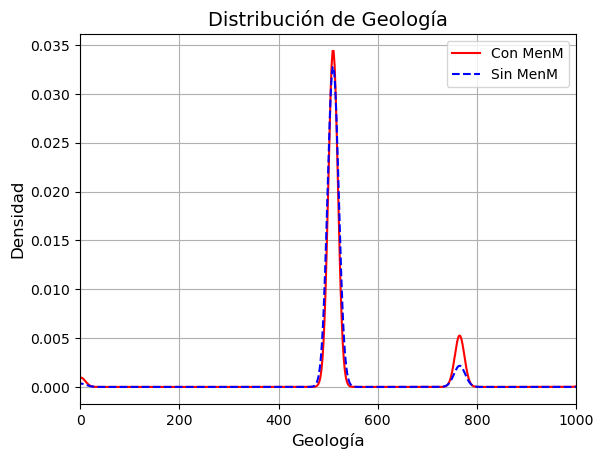

In [23]:

# Crear una figura de un tamaño personalizado
plt.figure(figsize=(8, 6))

# Crear un fondo claro
fig, ax = plt.subplots()
ax.set_facecolor('white')

# Graficar las curvas con colores y estilos personalizados
no_lands['geologia'].plot.kde(ax=ax, label='Con MenM', color='red', linestyle='-')
si_lands['geologia'].plot.kde(ax=ax, label='Sin MenM', color='blue', linestyle='--')

ax.set_xlim(0, 1000)

# Añadir un título
ax.set_title('Distribución de Geología', size=14)

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Geología', color='black', size=12)
ax.set_ylabel('Densidad', color='black', size=12)
ax.legend(loc=1, fontsize=10)

# Añadir una cuadrícula
ax.grid(True)

# Tamaño de las etiquetas y ejes
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()  # Mostrar el gráfico

Reclasificar en clases cada mapa y asignar un valor entre 0 a 1 a clada clase.

Pendiente

[0.1 0.5 1.  nan]


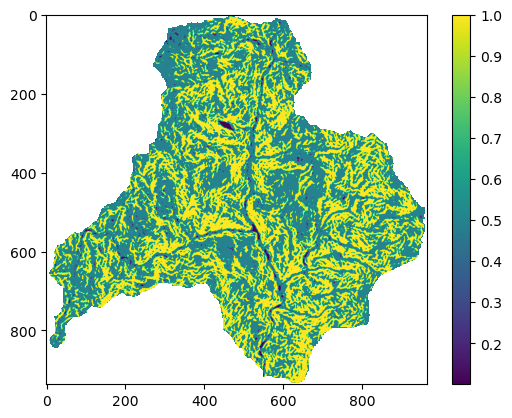

In [24]:
pendiente_re=np.where ( (np.logical_and (pendiente>=0, pendiente<5 )),0.1,pendiente );
pendiente_re=np.where ( (np.logical_and (pendiente_re>=5, pendiente_re<33 )),0.5,pendiente_re);
pendiente_re=np.where ( pendiente_re>=33,1,pendiente_re);
print(np.unique(pendiente_re));
plt.imshow(pendiente_re);
plt.colorbar();

Curvatura

[0.1 0.2 0.3 1.  nan]


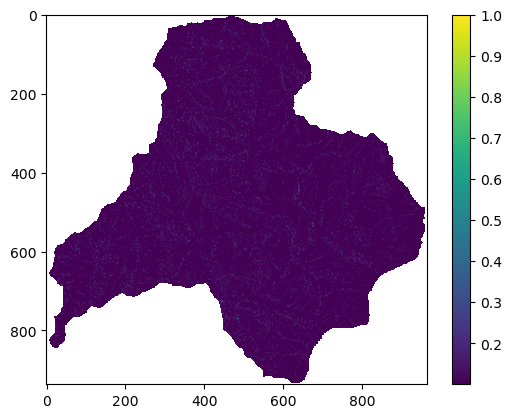

In [40]:

curvaturaV_re=np.where ( curvatura<-30,1,curvatura);
curvaturaV_re=np.where ( (np.logical_and (curvaturaV_re>=-30, curvaturaV_re<-20)),0.1,curvaturaV_re);
curvaturaV_re=np.where ( (np.logical_and (curvaturaV_re>=-20, curvaturaV_re<-10)),0.2,curvaturaV_re);
curvaturaV_re=np.where ( (np.logical_and (curvaturaV_re>=-10, curvaturaV_re<-5)),0.2,curvaturaV_re);
curvaturaV_re=np.where ( (np.logical_and (curvaturaV_re>=-5, curvaturaV_re<-2.5)),0.2,curvaturaV_re);
curvaturaV_re=np.where ( (np.logical_and (curvaturaV_re>=-2.5, curvaturaV_re<0)),0.1,curvaturaV_re);
curvaturaV_re=np.where ( (np.logical_and (curvaturaV_re>=0, curvaturaV_re<2.5)),0.1,curvaturaV_re);
curvaturaV_re=np.where ( (np.logical_and (curvaturaV_re>=2.5, curvaturaV_re<5)),0.2,curvaturaV_re);
curvaturaV_re=np.where ( (np.logical_and (curvaturaV_re>=5, curvaturaV_re<10)),0.2,curvaturaV_re);
curvaturaV_re=np.where ( (np.logical_and (curvaturaV_re>=10, curvaturaV_re<15)),0.2,curvaturaV_re);
curvaturaV_re=np.where ( (np.logical_and (curvaturaV_re>=15, curvaturaV_re<17.5)),0.3,curvaturaV_re);
curvaturaV_re=np.where ( (np.logical_and (curvaturaV_re>=17.5, curvaturaV_re<20)),0.3,curvaturaV_re);
curvaturaV_re=np.where ( curvaturaV_re>=20,1,curvaturaV_re);
print(np.unique(curvaturaV_re))
plt.imshow(curvaturaV_re);
plt.colorbar();

Flujo_acum

[0.1 0.7 1.  nan]


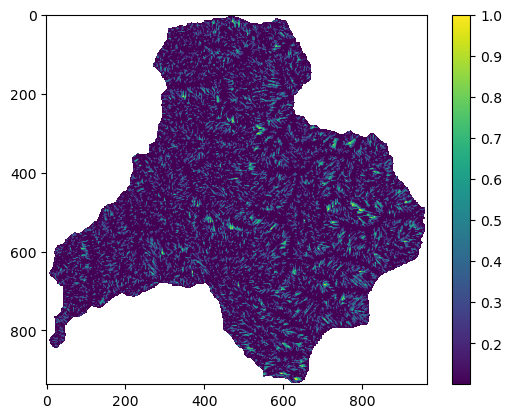

In [41]:
flujo_re=np.where (flujo<1,0.1,flujo);
flujo_re=np.where ( (np.logical_and (flujo_re>=1, flujo_re<2)),0.1,flujo_re);
flujo_re=np.where ( (np.logical_and (flujo_re>=2, flujo_re<15)),0.1,flujo_re);
flujo_re=np.where ( (np.logical_and (flujo_re>=15, flujo_re<25)),0.7,flujo_re);
flujo_re=np.where ( flujo_re>=25,1,flujo_re);
print(np.unique(flujo_re))
plt.imshow(flujo_re);
plt.colorbar();

Aspecto

[0.1 0.3 0.9 nan]


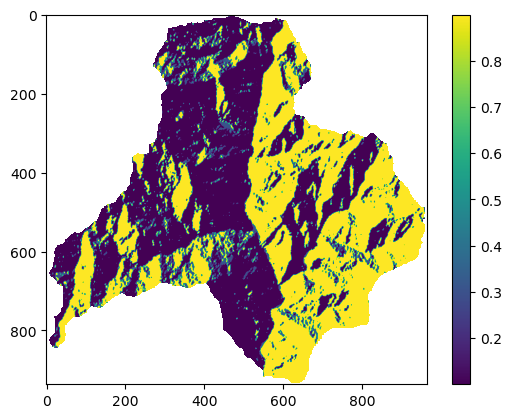

In [42]:
aspecto_re=np.where ( aspecto<25,0.3,aspecto);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=25, aspecto_re<200 )),0.1,aspecto_re);
aspecto_re=np.where ( aspecto_re>=200,0.9,aspecto_re);
print(np.unique(aspecto_re))
plt.imshow(aspecto_re);
plt.colorbar();

Geologia

[0.1 0.3 0.5 1.  nan]


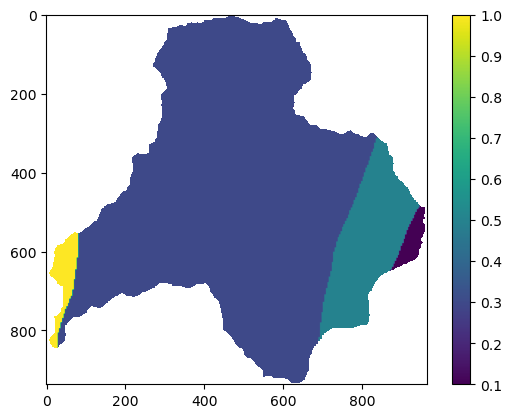

In [43]:
#geologia_re=np.where ( geologia==1,1,geologia)
geologia_re=np.where ( geologia==1020,0.0,geologia)
geologia_re=np.where ( geologia_re==765,0.5,geologia_re)
geologia_re=np.where ( geologia_re==510,0.3,geologia_re)
geologia_re=np.where ( geologia_re==1,1,geologia_re)
geologia_re=np.where ( geologia_re==0.0,0.1,geologia_re)

print(np.unique(geologia_re))
plt.imshow(geologia_re);
plt.colorbar();

ootr

In [44]:
print(w[0],w[1],w[2],w[3],w[4])

(0.4442310186410992+0j) (0.232394228911128+0j) (0.09862423732781217+0j) (0.14123903357256318+0j) (0.055362022740610306+0j)


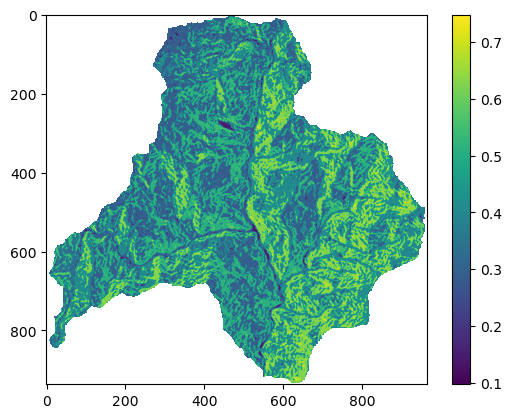

In [45]:
IS=0.1412*aspecto_re+0.0554*geologia_re+0.2324*curvaturaV_re+0.0986*flujo_re+0.4442*pendiente_re
plt.imshow(IS);
plt.colorbar();

In [47]:
meta=raster.profile
raster_transform = meta['transform']
raster_crs = meta['crs']

with rio.open('IS.TIF', 'w', 
              driver='Gtiff',height=aspecto.shape[0],width=aspecto.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster_crs,transform=raster_transform) as dst:
    dst.write(IS,1);